# Introduction: 

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

# Business Understanding:


The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.


# Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
# Importing the required libraries and filtering the warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings(action="ignore")
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

In [2]:
# Reading the dataset

application_data = pd.read_csv("application_data.csv")
previous_application = pd.read_csv("previous_application.csv")

In [3]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

# Checking the size of dataset

In [5]:
application_data.shape

(307511, 122)

In [6]:
previous_application.shape

(1670214, 37)

# Inspecting the data

In [7]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [8]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [9]:
# Database column types
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [10]:
previous_application.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [11]:
application_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [12]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
previous_application.info

<bound method DataFrame.info of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1            

# Data Cleaning  and Manipulation: 

Data cleaning involves removing or imputing missing values.

Dropping the unneessary columns and columns which have more than 40% of Null Values 

In [14]:
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [15]:
(round(application_data.isnull().sum()/application_data.shape[0]*100,2))

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

## Analyze & Delete Unnecessary Columns in application_data

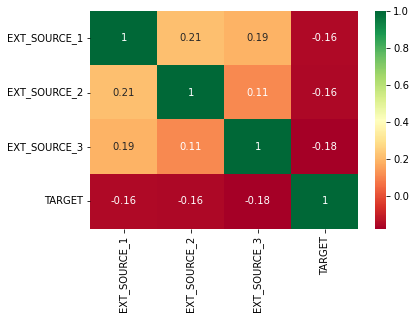

In [16]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = application_data[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

 Insight: Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [17]:
# Removing all the columns with more than 40% nulls values/Keeping all of them with <= 40% null values
application_data = application_data.loc[:,((application_data.isnull().sum()/application_data.shape[0])*100)<40]
application_data.shape

(307511, 73)

In [18]:
# Removing the flag document as it is not able to give much insights

Drop_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3']

application_data.drop(labels=Drop_col,axis=1,inplace=True) 



In [19]:
application_data.shape

(307511, 42)

## Null Value Data Imputation

Filling of categorical data

In [20]:
application_data.NAME_TYPE_SUITE.describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [21]:
application_data['NAME_TYPE_SUITE'].fillna((application_data['NAME_TYPE_SUITE'].mode()[0]),inplace = True)


In [22]:
application_data['OCCUPATION_TYPE'].fillna((application_data['OCCUPATION_TYPE'].mode()[0]),inplace = True)


In [23]:
##Filling of numerical data

application_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%                     0.000000                    0.000000  
50%                     0.000000                    1.000000  
75%                     0.000000                    3.000000  
max                   261.000000                   25.000000

In [24]:
numerical = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'] 
for i in numerical:
    application_data[numerical].fillna((application_data[numerical].median()[0]),inplace = True)

In [25]:
# Time to work on previous_data and take care on cleaning part

In [26]:
previous_application.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [27]:
(round(previous_application.isnull().sum()/previous_application.shape[0]*100,2))

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [28]:
previous_application = previous_application.loc[:,((previous_application.isnull().sum()/previous_application.shape[0])*100)<40]
previous_application.shape

(1670214, 26)

In [29]:
(round(previous_application.isnull().sum()/previous_application.shape[0]*100,2))

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

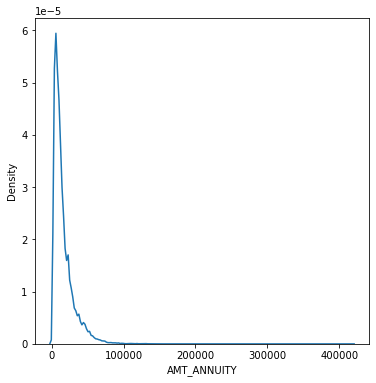

In [30]:
plt.figure(figsize=(6,6))
sns.kdeplot(previous_application['AMT_ANNUITY'])
plt.show()

We saw sudden peak at the left side of the distribution which means it has outliers so we won't use mean here. We will prefer median.

In [31]:
previous_application['AMT_ANNUITY'].fillna((previous_application['AMT_ANNUITY'].median()),inplace = True)

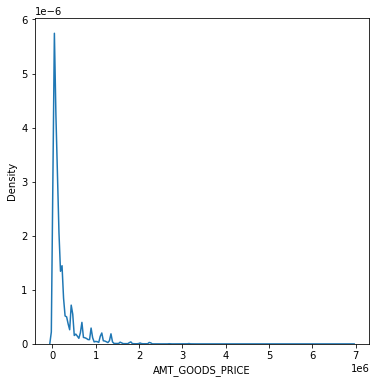

In [32]:
plt.figure(figsize=(6,6))
sns.kdeplot(previous_application['AMT_GOODS_PRICE'])
plt.show()

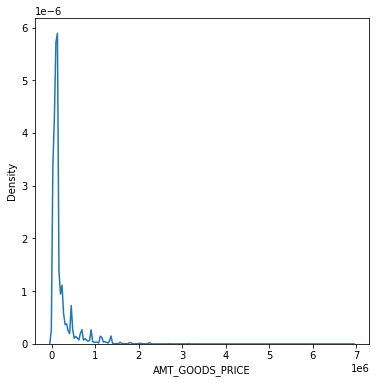

In [33]:
previous_application['AMT_GOODS_PRICE'].fillna((previous_application['AMT_GOODS_PRICE'].median()),inplace = True)
plt.figure(figsize=(6,6))
sns.kdeplot(previous_application['AMT_GOODS_PRICE'])
plt.show()

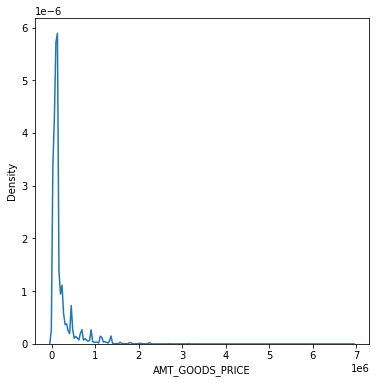

In [34]:
previous_application['AMT_GOODS_PRICE'].fillna((previous_application['AMT_GOODS_PRICE'].mode()),inplace = True)
plt.figure(figsize=(6,6))
sns.kdeplot(previous_application['AMT_GOODS_PRICE'])
plt.show()

Mode is prefered as the original distribution is more closer to it

In [35]:
previous_application['AMT_GOODS_PRICE'].fillna((previous_application['AMT_GOODS_PRICE'].mode()[0]),inplace = True)


In [36]:
previous_application.loc[previous_application['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

We will impuate CNT_PAYMENT status payment with 0 because NAME_CONTRACT_STATUS of most of the loans were not started.

In [37]:
previous_application.CNT_PAYMENT.fillna(0, inplace=True)

In [38]:
(round(previous_application.isnull().sum()/previous_application.shape[0]*100,2))

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                    0.00
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_GOODS_PRICE                0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
CNT_PAYMENT                    0.00
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

We can ignore product_combination as it have very less null values

## Handling Outliers 

### Outliers checking for application_data set

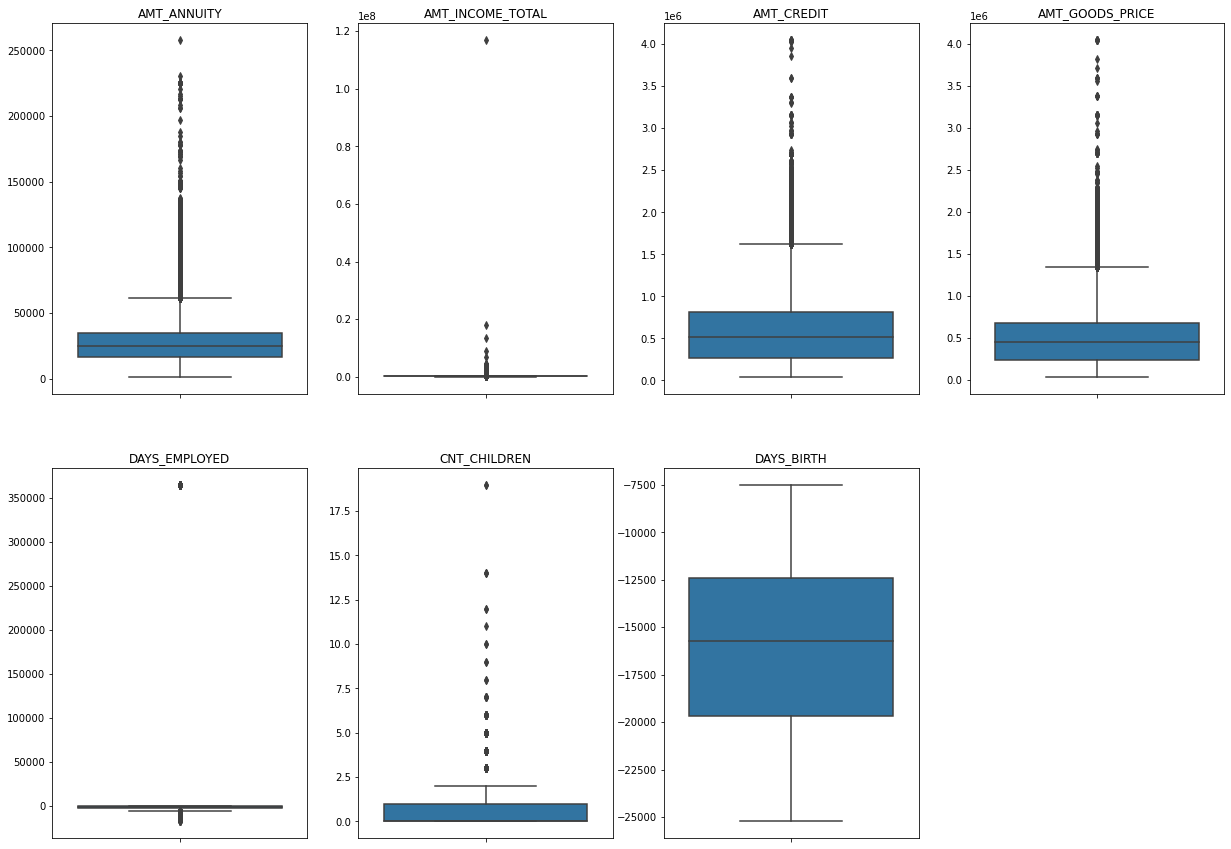

In [39]:
plt.figure(figsize=(21,15))

application_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
application_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(application_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=application_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(application_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=application_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

Insights : Maximum number of outliers exists in "DAYS EMPLOYED" and it's values are near to 350000 which means 958 years hence it is inorrect entry.
In AMT_INCOME_TOTAL it reflects that very low loan applicants have high income as comapred to others.
DAYS_BIRTH have no outlier so it's data is very realiable.
In rest, outliers are less so data is realiable.

### Outliers checking for previous_application data set

In [40]:
previous_application.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  \
count  1.670213e+06     1.670214e+06             1.670214e+06   
mean   1.961140e+05     2.011815e+05             1.248418e+01   
std    3.185746e+05     2.808629e+05             3.334028e+00   
min    0.000000e+00     0.000000e+00             0.000000e+00   
25%    2.416050e+04     6.750000e+04             1.000000e+01   
50%    8.054100e+04     1.123200e+05             1.200000e+01   
75%    2.164185e+05     1.804050e+05             1.500000e+01   
max    6.905160e+06     6.905160e+06             2.300000e+01   

       NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  
count            1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06  
mean             9.964675e-01  -8.806797e+02      3.139511e+02  1.247621e+01  
std              5.932963e-02   7.790997e+02      7.127443e+03  1.447588e+01  
min              0.000000e+00  -2.922000e+03     -1.000000e+00  0.000000e+00  
25%              1.000000e+00  -1.300000e+03     -1.000000e+00  0.000000e+00  
50%              1.000000e+00  -5.810000e+02      3.000000e+00  1.000000e+01  
75%              1.000000e+00  -2.800000e+02      8.200000e+01  1.600000e+01  
max              1.000000e+00  -1.000000e+00      4.000000e+06  8.400000e+01

'AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT'All these columns have max values so we are taking these for observing outliers.

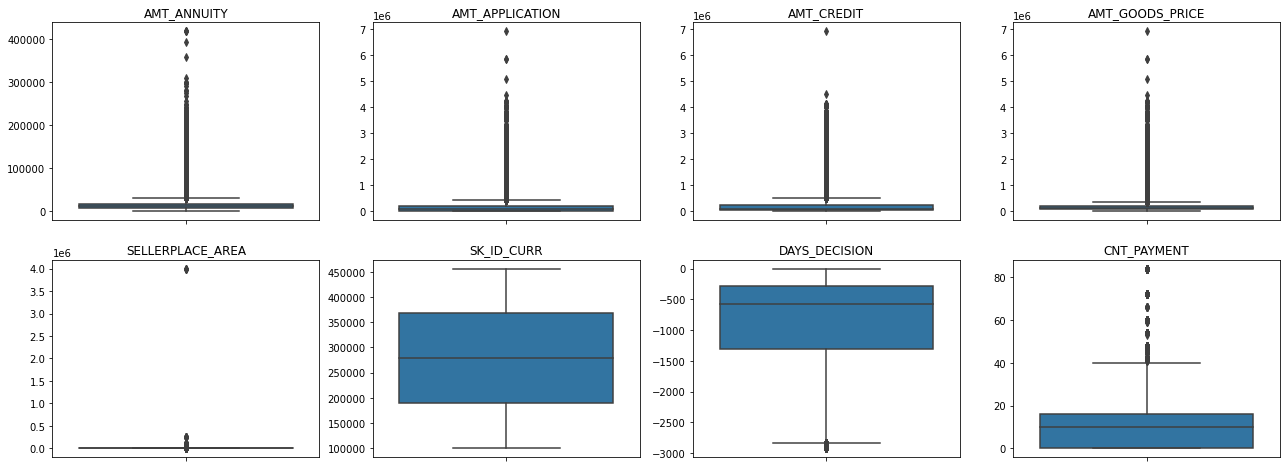

In [41]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previous_application[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previous_application[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

Insights:
1. Max outliers are in SELLERPLACE_AREA so its risky to take this one.
2. SK_ID_CURR has no outliers among all so it has relevant data.
3. DAYS_DECISION and CNT_PAYMENT have very few outliers.
4. In remaining columns, outliers are there but not too many.

# Data Analysis

## Imbalance analysis

In [42]:
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0            -2120        Laborers                  WEDNESDAY   
1             -291      Core staff                     MONDAY   
2            -2531        Laborers                     MONDAY   
3            -2437        Laborers                  WEDNESDAY   
4            -3458      Core staff                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0  Business Entity Type 3      0.262949                       2.0   
1                  School      0.622246                       1.0   
2              Government      0.555912                      

In [43]:
Imbalance = application_data["TARGET"].value_counts()
Imbalance

0    282686
1     24825
Name: TARGET, dtype: int64

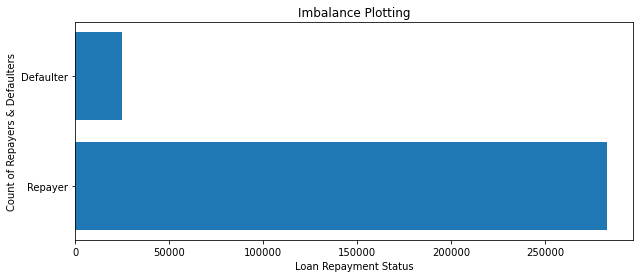

In [44]:
plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
plt.barh(x, Imbalance)
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [45]:
100*(application_data.TARGET.value_counts())/ (len(application_data))


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Insights: According to TARGET column, 91% people faced no difficuilty whereas 8% people faced difficulty. 

Dividing the dataset into 2 parts as Target 1 (People with payment difficulites) and Target 0 (all others)

In [46]:
Target_0=application_data[application_data["TARGET"]==0]
Target_1=application_data[application_data["TARGET"]==1]

In [47]:
Target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE NAME_INCOME_TYPE  \
1        1129500.0           Family    State servant   
2         135000.0    Unaccompanied          Working   
3         297000.0    Unaccompanied          Working   
4         513000.0    Unaccompanied          Working   
5         454500.0  Spouse, partner    State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
1             -291      Core staff                     MONDAY   
2            -2531        Laborers                     MONDAY   
3            -2437        Laborers                  WEDNESDAY   
4            -3458      Core staff                   THURSDAY   
5             -477        Laborers                  WEDNESDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   
5                       16                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   
5                       0                       0                        0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
1                  School      0.622246                       1.0   
2              Government      0.555912                       0.0   
3  Business Entity Type 3      0.650442                

Target_0.columns

In [49]:
Target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
26                    0.018029      -18724          -2628            -6573.0   
40                    0.025164      -17482          -1262            -1182.0   
42                    0.007305      -13384          -3597              -45.0   
81                    0.028663      -24794         365243            -5391.0   

    DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0             -2120        Laborers                  WEDNESDAY   
26            -1827   Cooking staff                     MONDAY   
40            -1029        Laborers                    TUESDAY   
42            -4409     Sales staff                   THURSDAY   
81            -4199        Laborers                   THURSDAY   

    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
26                        9                           0   
40                        9                           0   
42                       11                           0   
81                       10                           0   

    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                            0                            0   
26                           0                            0   
40                           0                            0   
42                           0                            0   
81                           0                            0   

    REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                        0                       0                        0   
26                       0                       0                        0   
40                       0                       0                        0   
42                       0                       0                        0   
81                       0                       0                        0   

         ORGANIZATION_TYPE  EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  \
0   Business Entity Type 3      0.262949                       2.0   
26  Business Entity Type 3      0.548477     

# Correlation between numeric variable

In [104]:
cols_for_cor = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = Target_0.corr() # Repayers

# Defaulters dataframe
Defaulter_df = Target_1.corr() # Defaulters





In [94]:
# Top 10 correlation of Repayers for Data Frame 
corr_repayer = Repayer_df
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1                        VAR2  Correlation
680     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998508
184              AMT_GOODS_PRICE                  AMT_CREDIT     0.987250
464  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
711     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.859332
557      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381
185              AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686
154                  AMT_ANNUITY                  AMT_CREDIT     0.771309
278                DAYS_EMPLOYED                  DAYS_BIRTH     0.618048
433   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.446101
526       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY     0.435514

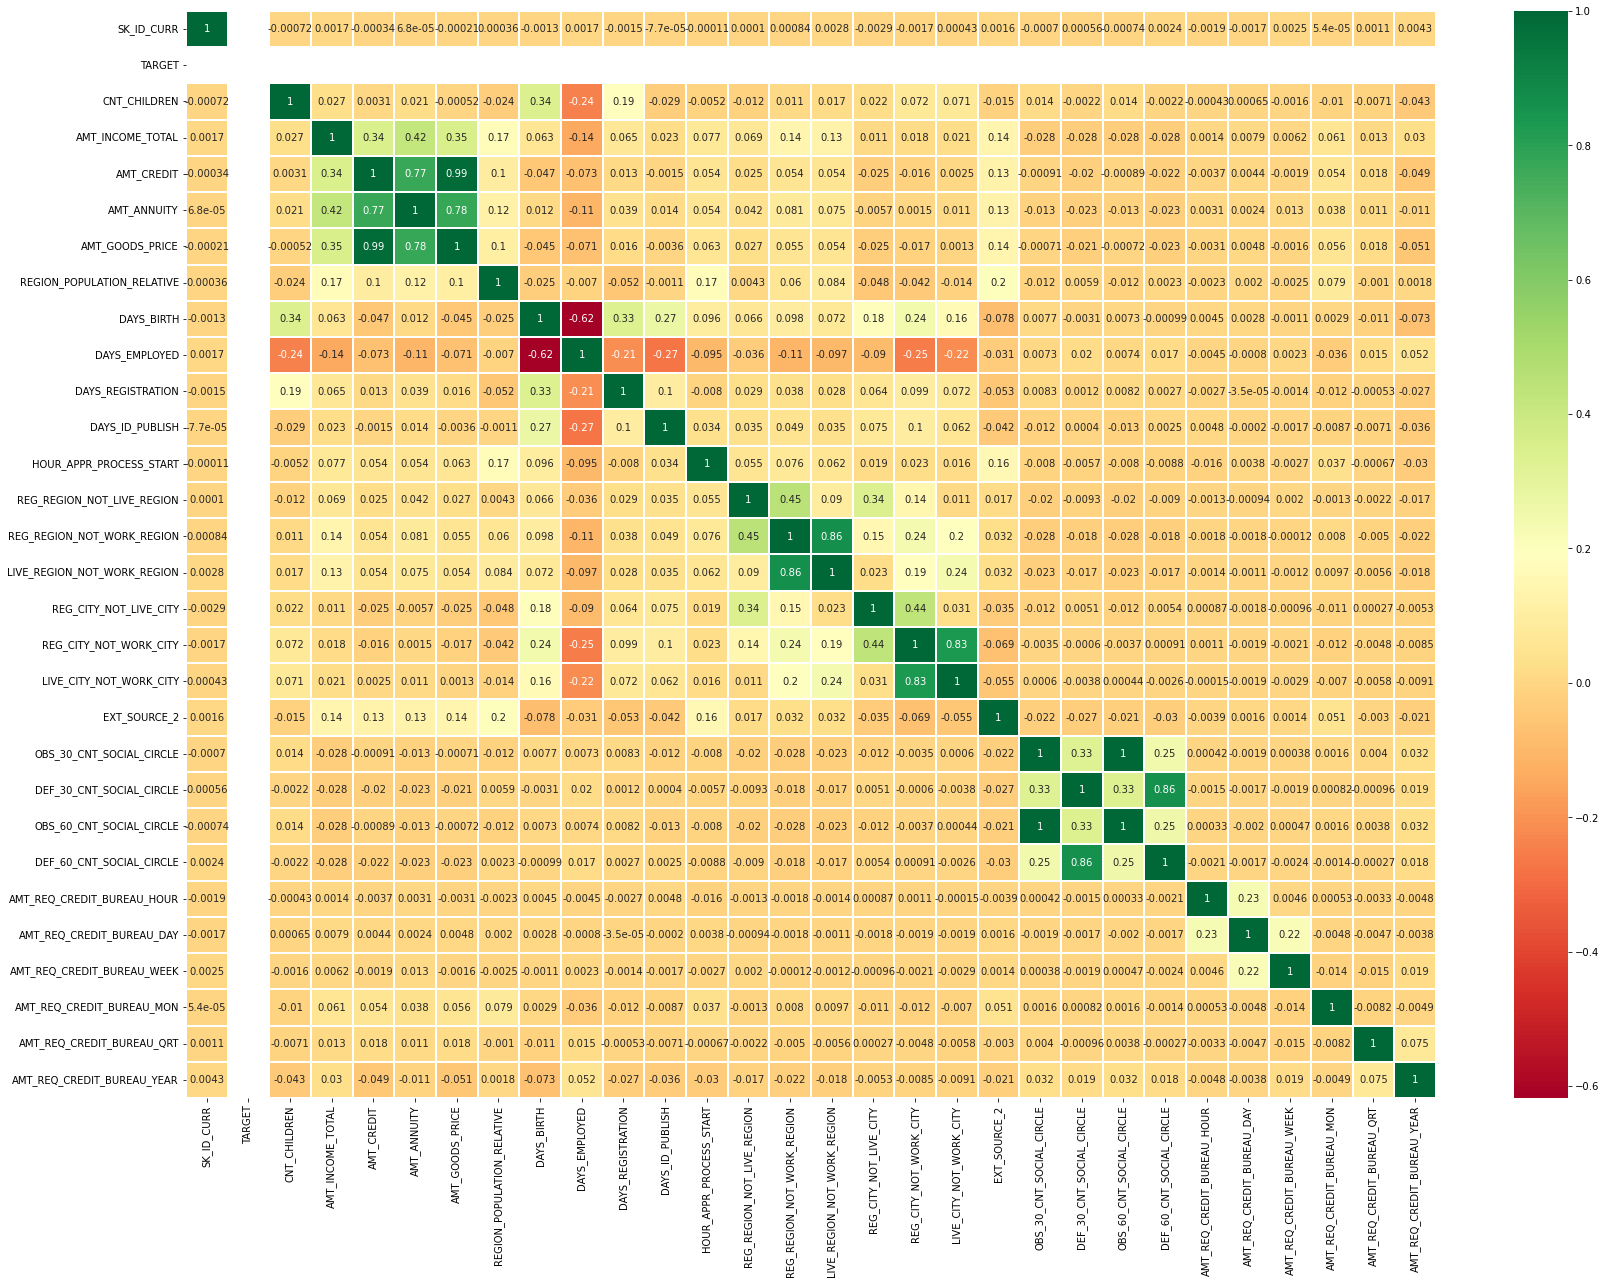

In [96]:
fig = plt.figure(figsize=(28,20))
ax = sns.heatmap(Repayer_df, cmap="RdYlGn",annot=True,linewidth =1)

Insights:
 1. We can see that the repayers have a high correlation in the number of days employed.
 2. Credit amount is highly co-related with Good Price amount, Loans Annuity and Total income. 
 3. REGION_RATING_CLIENT_W_CITY	& REGION_RATING_CLIENT are correlated
 4. DAYS_EMPLOYED DAYS_BIRTH ,FLAG_EMP_PHONE DAYS_BIRTH gives the relation of the age group
 5. FLAG_EMP_PHONE & DAYS_EMPLOYED high correlation which we can get information wether the client is still employed.

In [101]:
# Top 10 co-relation for the defaulter data 
corr_defaulter = Defaulter_df
corr_defaulter = corr_defaulter.where(np.triu(np.ones(corr_defaulter.shape),k=1).astype(np.bool))
corr_df_defaulter = corr_defaulter.unstack().reset_index()
corr_df_defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_defaulter["Correlation"]=corr_df_defaulter["Correlation"].abs()
corr_df_defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_defaulter.head(10)

VAR1                        VAR2  Correlation
680     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998269
184              AMT_GOODS_PRICE                  AMT_CREDIT     0.983103
711     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.868994
464  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
557      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540
185              AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699
154                  AMT_ANNUITY                  AMT_CREDIT     0.752195
278                DAYS_EMPLOYED                  DAYS_BIRTH     0.575097
433   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.497937
526       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY     0.472052

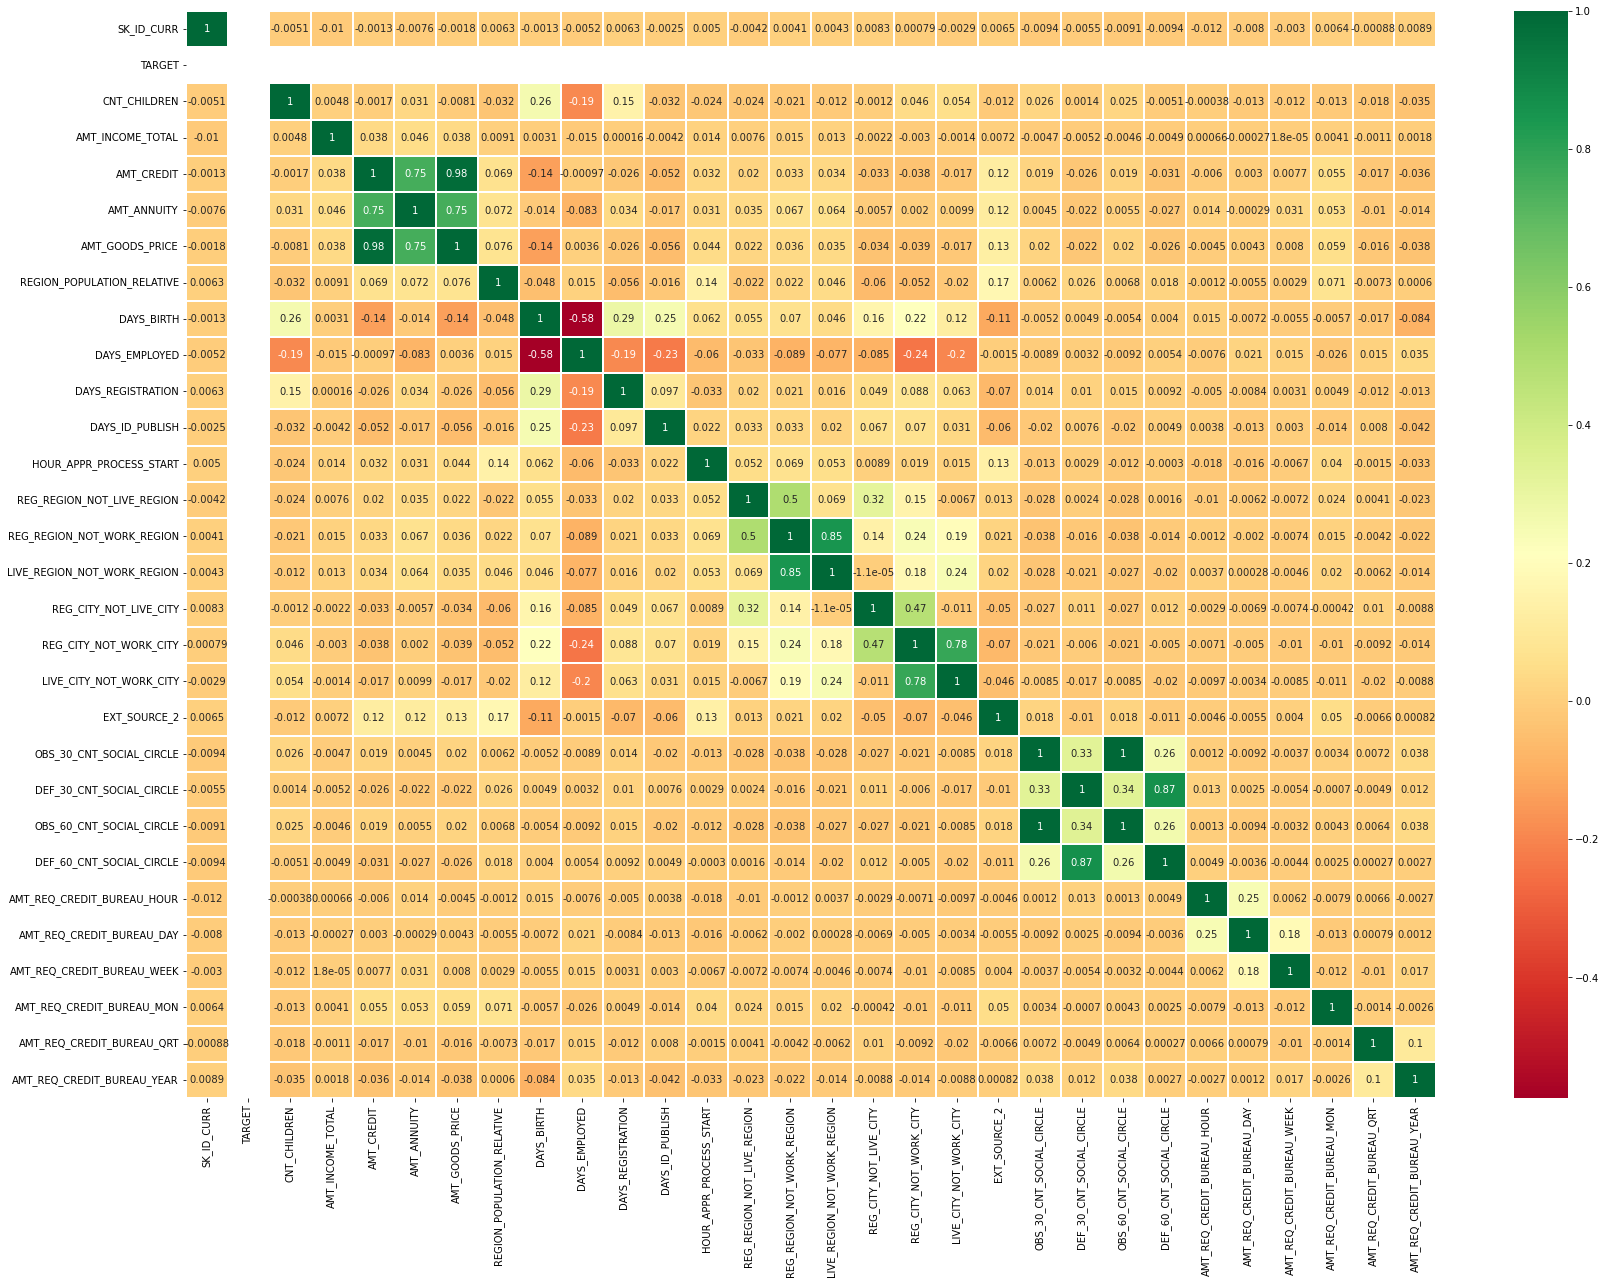

In [102]:
#Plotting the heat map for the defaulters data 
fig = plt.figure(figsize=(28,20))
ax = sns.heatmap(Defaulter_df, cmap="RdYlGn",annot=True,linewidth =1)

Insights  :

1. FLAG_EMP_PHONE & DAYS_EMPLOYED are highly corelated as it gives the information of the 	
2. Credit amount is highly correlated with good price amount.  
3. Loan annuity correlation with credit amount has slightly reduced from (.77 to .75)in defaulters when compared to repayers
4. Age of the client and the no. of days employed give the insight about the working profile.(such as student or experinced employee)

## Univariate analysis of Numerical variable

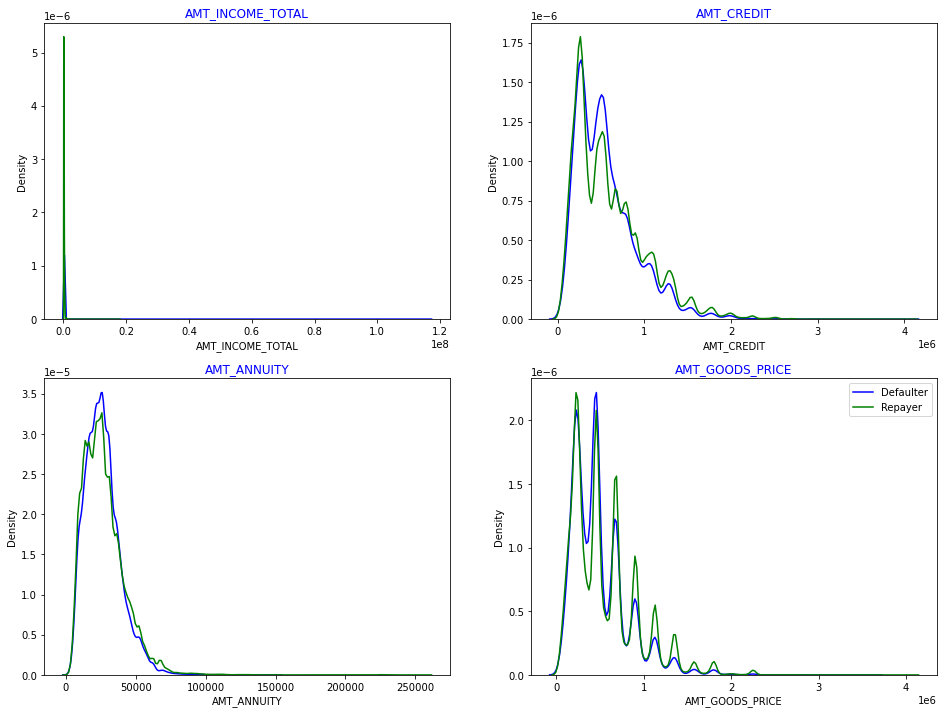

In [50]:
amount = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE',]]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Target_1[i[1]], hist=False, color='b',label ="Defaulter")
    sns.distplot(Target_0[i[1]], hist=False, color='g',label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

Insights: In AMT_CREDIT,most of the loans given under 10 lakhs.
          Most of the people pay Annuity below 50000.
          Credit amount for goods was mostly under 10 lakhs.
          AMT_INCOME_TOTAL got overlaped so we will not use this furthur.

## Bivariate Analysis of numercial variables

<Figure size 720x360 with 0 Axes>

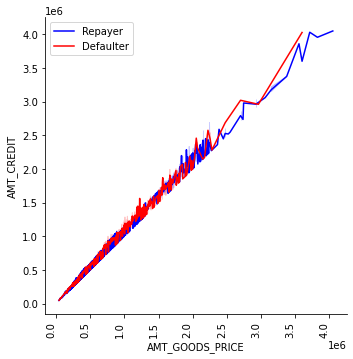

In [51]:
plt.figure(figsize=(10,5))
sns.relplot(x="AMT_GOODS_PRICE", y="AMT_CREDIT", data=application_data, hue="TARGET",kind="line",palette = ['b','r'],legend = False)
plt.legend(['Repayer','Defaulter'])
plt.xticks(rotation=90, ha='right')
plt.show()


Insights: When the credit_amount goes up above 3M than there is increase in defaulters.

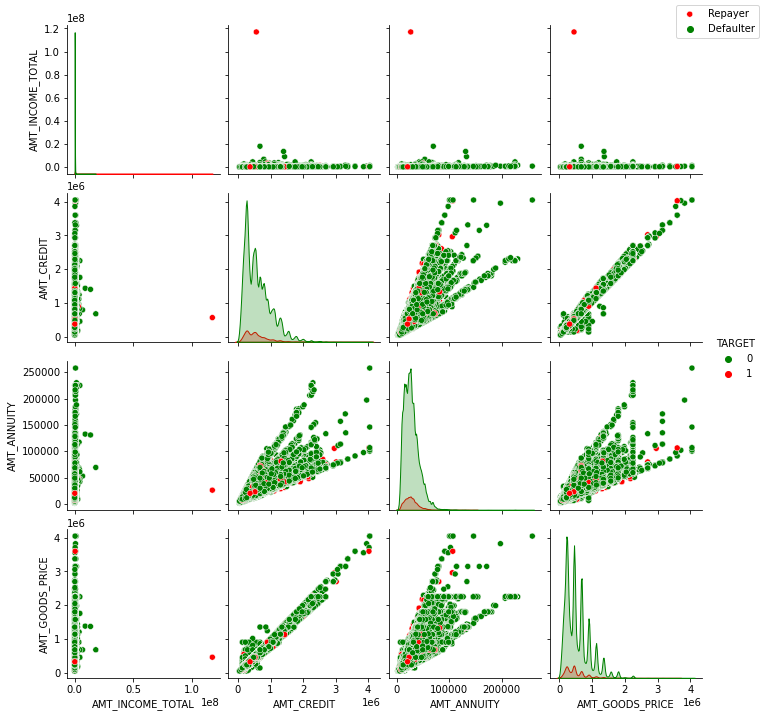

In [52]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = application_data[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

 Insight :   1) When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters  
             2)AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are                    consolidated in form of a link
             3)There are very less defaulters for AMT_CREDIT >3M
             4)Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences                      section

## Univariate analysis of  Categorical variables

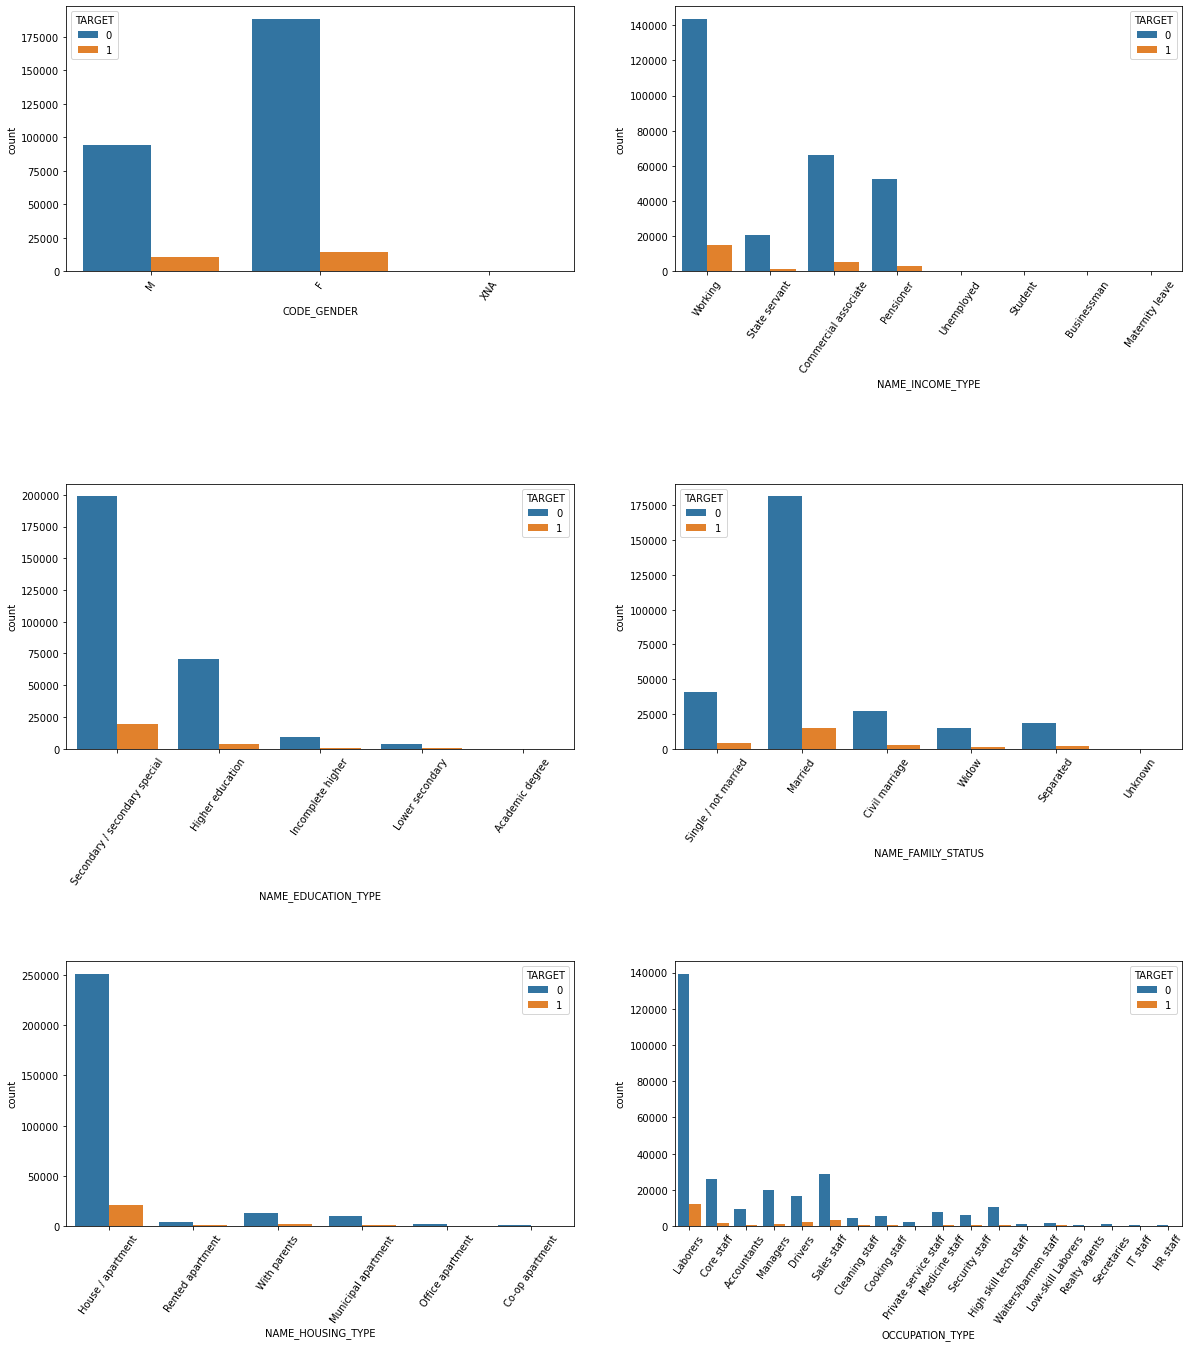

In [53]:
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = application_data)
    plt.xticks(rotation = 55)

Insights: 1) No of female clients are more than Male clients. There are higher chances in male for                not returing the  loan. 
          2) Students and businessman categories do not have any default record so these 2 catogores             are safe to provide loan.
          3) Working clients can be targeted to provide loans and there are higher chances of                      replaying the loans in  them.
          4) Clients with Secondary education are more repayable. 
          5) Academic degree have less default rate and lower secondary have more chances of default.
          6) Most of the loans are taken by married people and most of the defaulters are belong to                Civil marriage people.
          7) People living in office apartment aand co-ap apartment have lowest default rate and                  people with rented  aparment have higher probability of defaulty.
          8) Category with highest percentage of not returning the loans are low skilled laborers                  followed by drivers,waiters/barmen, security staff, laborers and cooking staff.

## Bi/Multivariate Analysis of Categorical variables

In [54]:
application_data.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count           mean            std       min  \
NAME_INCOME_TYPE                                                         
Businessman               10.0  652500.000000  627226.035812  180000.0   
Commercial associate   71617.0  202955.327289  147974.151536   26550.0   
Maternity leave            5.0  140400.000000  126856.907577   49500.0   
Pensioner              55362.0  136401.292273   76650.331247   25650.0   
State servant          21703.0  179737.969506  100880.579748   27000.0   
Student                   18.0  170500.000000  106644.682171   81000.0   
Unemployed                22.0  110536.363636   88055.079059   26550.0   
Working               158774.0  163169.889223  307577.685942   25650.0   

                           25%       50%       75%          max  
NAME_INCOME_TYPE                                                 
Businessman           225000.0  495000.0  843750.0    2250000.0  
Commercial associate  135000.0  180000.0  225000.0   18000090.0  
Maternity leave        67500.0   90000.0  135000.0     360000.0  
Pensioner              90000.0  117000.0  166500.0    2250000.0  
State servant         112500.0  157500.0  225000.0    3150000.0  
Student               112500.0  157500.0  178875.0     562500.0  
Unemployed             54000.0   78750.0  135000.0     337500.0  
Working               112500.0  135000.0  202500.0  117000000.0

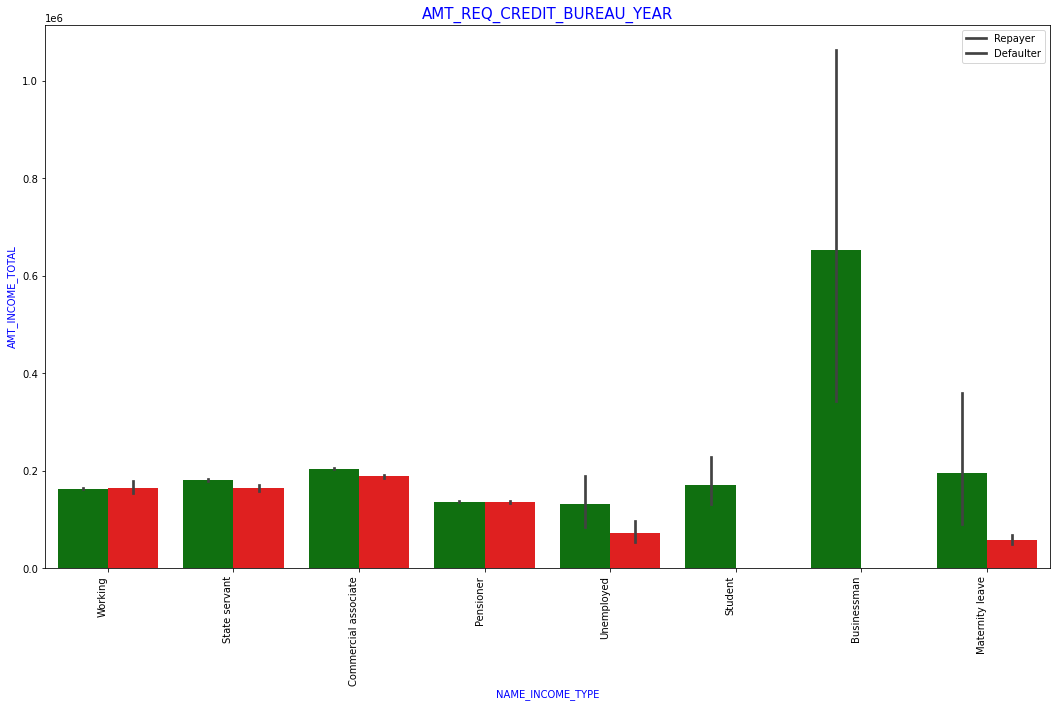

In [55]:
# Income type vs Income Amount Range

plt.figure(figsize =(18,10))
sns.barplot("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",data=application_data, hue='TARGET', palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
plt.xlabel('NAME_INCOME_TYPE',fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
plt.ylabel('AMT_INCOME_TOTAL',fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
plt.title('AMT_REQ_CREDIT_BUREAU_YEAR', fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
plt.xticks(rotation=90, ha='right')
plt.legend(labels = ['Repayer','Defaulter'])
plt.show()


Insights  : It can be seen It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs 

# Merged Dataframes Analysis

## Merging Data Frames of application data and previous application for Analysis 

In [56]:
appdf=application_data[['SK_ID_CURR','TARGET']]
appdf

SK_ID_CURR  TARGET
0           100002       1
1           100003       0
2           100004       0
3           100006       0
4           100007       0
...            ...     ...
307506      456251       0
307507      456252       0
307508      456253       0
307509      456254       1
307510      456255       0

[307511 rows x 2 columns]

In [57]:
#merging application and previous application data on 'SK_ID_CURR'
merged = appdf.merge(previous_application,on='SK_ID_CURR', how='inner')
merged.shape

(1413701, 27)

In [58]:
merged.describe()

SK_ID_CURR        TARGET    SK_ID_PREV   AMT_ANNUITY  \
count  1.413701e+06  1.413701e+06  1.413701e+06  1.413701e+06   
mean   2.784813e+05  8.655296e-02  1.922744e+06  1.484032e+04   
std    1.028118e+05  2.811789e-01  5.327153e+05  1.316370e+04   
min    1.000020e+05  0.000000e+00  1.000001e+06  0.000000e+00   
25%    1.893640e+05  0.000000e+00  1.461346e+06  7.406055e+03   
50%    2.789920e+05  0.000000e+00  1.922698e+06  1.125000e+04   
75%    3.675560e+05  0.000000e+00  2.384012e+06  1.674797e+04   
max    4.562550e+05  1.000000e+00  2.845381e+06  4.180581e+05   

       AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  \
count     1.413701e+06  1.413700e+06     1.413701e+06   
mean      1.752436e+05  1.963541e+05     2.006552e+05   
std       2.936222e+05  3.194813e+05     2.820189e+05   
min       0.000000e+00  0.000000e+00     0.000000e+00   
25%       1.975050e+04  2.488050e+04     6.637500e+04   
50%       7.087050e+04  8.059500e+04     1.123200e+05   
75%       1.800000e+05  2.156400e+05     1.800000e+05   
max       5.850000e+06  4.509688e+06     5.850000e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  \
count             1.413701e+06            1.413701e+06   1.413701e+06   
mean              1.247893e+01            9.964321e-01  -8.803670e+02   
std               3.331474e+00            5.962560e-02   7.835402e+02   
min               0.000000e+00            0.000000e+00  -2.922000e+03   
25%               1.000000e+01            1.000000e+00  -1.313000e+03   
50%               1.200000e+01            1.000000e+00  -5.820000e+02   
75%               1.500000e+01            1.000000e+00  -2.710000e+02   
max               2.300000e+01            1.000000e+00  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  
count      1.413701e+06  1.413701e+06  
mean       3.149878e+02  1.256367e+01  
std        7.695082e+03  1.448807e+01  
min       -1.000000e+00  0.000000e+00  
25%       -1.000000e+00  0.000000e+00  
50%        4.000000e+00  1.000000e+01  
75%        8.500000e+01  1.800000e+01  
max        4.000000e+06  8.400000e+01

In [59]:
# Checking the data type and info 
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 27 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1413701 non-null  int64  
 1   TARGET                       1413701 non-null  int64  
 2   SK_ID_PREV                   1413701 non-null  int64  
 3   NAME_CONTRACT_TYPE           1413701 non-null  object 
 4   AMT_ANNUITY                  1413701 non-null  float64
 5   AMT_APPLICATION              1413701 non-null  float64
 6   AMT_CREDIT                   1413700 non-null  float64
 7   AMT_GOODS_PRICE              1413701 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 9   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 12  NAME_CASH_LOAN_PURPOSE       1413701 non-n

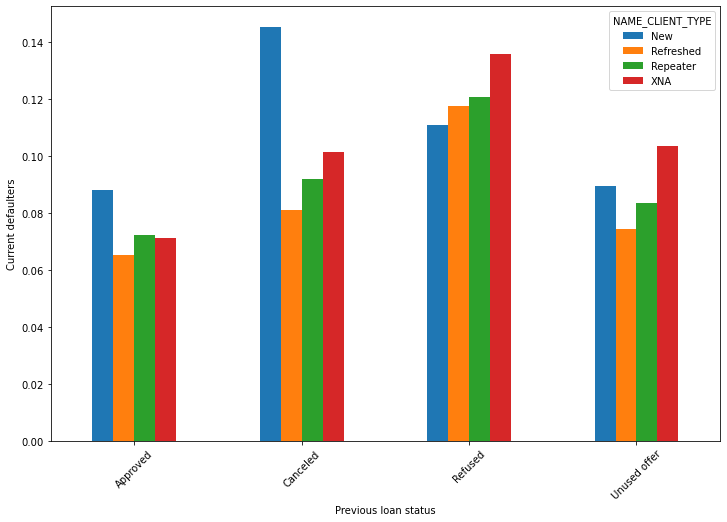

In [60]:
merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(12,8),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

Insights : 
1. The previously Approved status the New clients were more defaulted followed by Repeater.
2. For previously Canceled applicants the Defaulters are more New clients.
3. We can see that the Defaulters are more for previously Unused offers loan status clients, who were found to be new. 
4. Previously Refused applicants, the defaulters are more refreshed clients.

In [61]:
A_1 = merged[merged['TARGET']==0] # Repayers
A_2= merged[merged['TARGET']==1] # Defaulters

In [62]:
#Defining Univariate merged for the Analysis 
def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [63]:
def perc_defaulter(dataframe,feature,vertical=True):
    
    cat_perc = dataframe[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    if (vertical): 
        
        fig = px.bar(cat_perc, x=feature ,y="TARGET",height=400,text="TARGET")
        fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6,texttemplate='%{text:.2s}'+'%', textposition='outside')
        fig.update_layout(title_text='Percentage of Defaulters')
    else :
        
        fig = px.bar(cat_perc, x="TARGET" ,y=feature,height=400,text="TARGET")
        fig.update_traces(marker_color='rgb(150,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6,texttemplate='%{text:.2s}'+'%', textposition='outside')
        fig.update_layout(title_text='Percentage of Defaulters')
    fig.show()

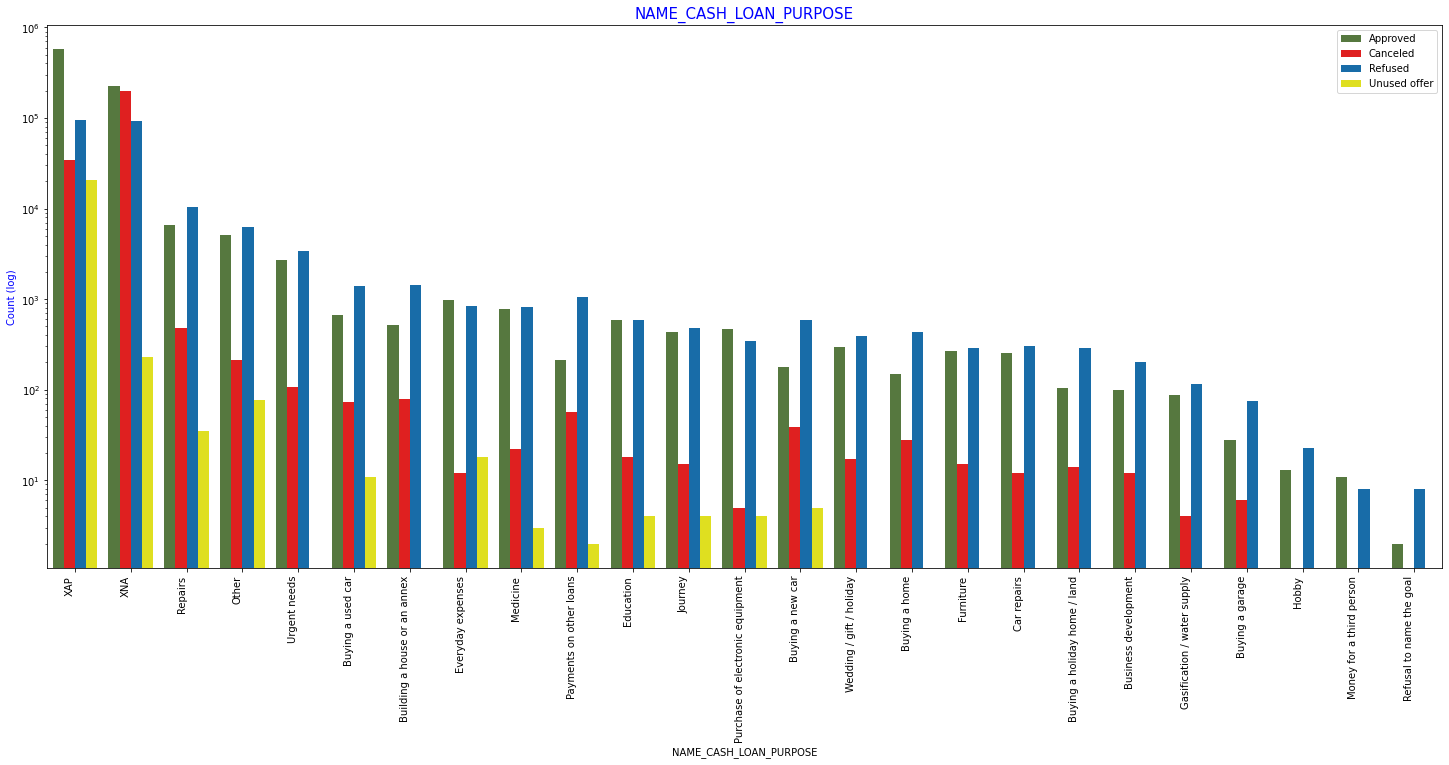

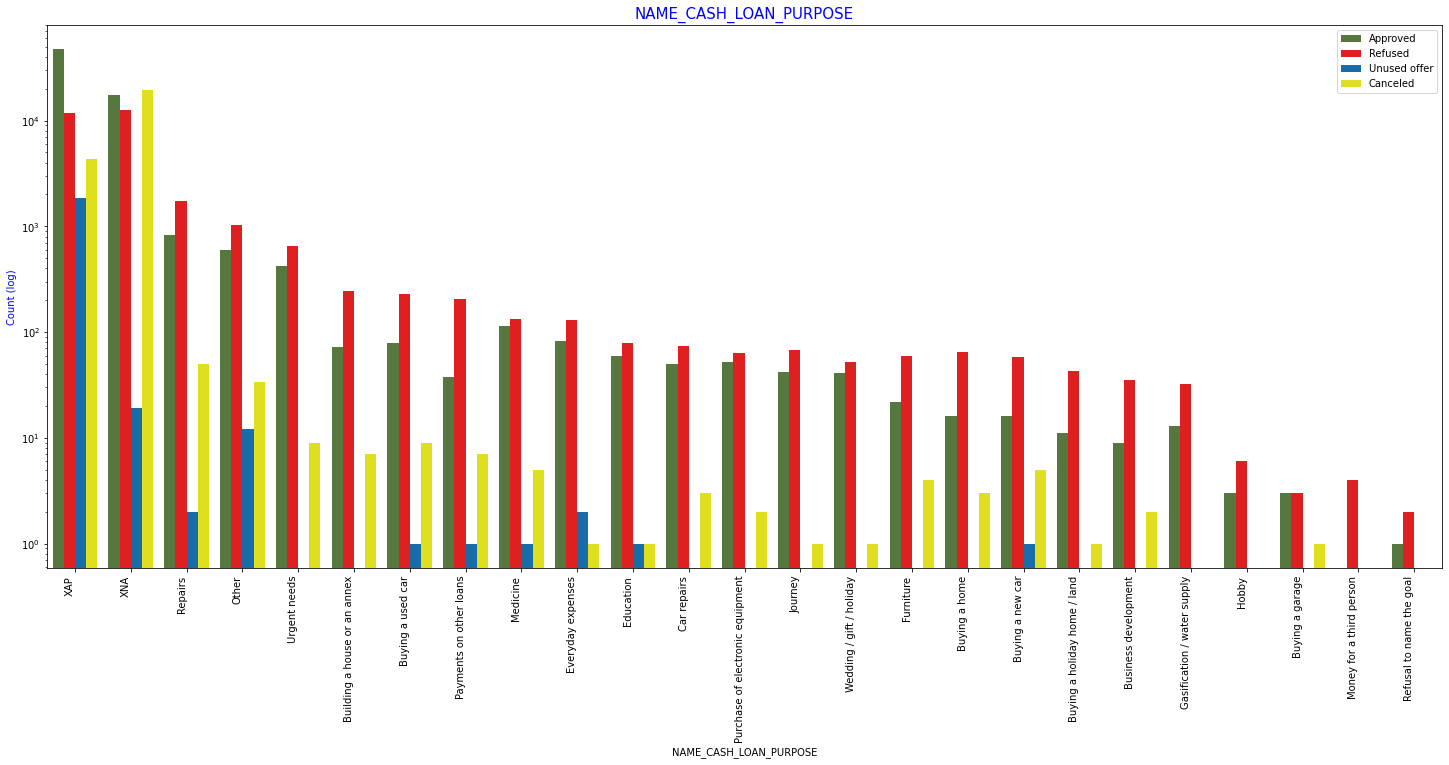

In [64]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",A_1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(25,10))

univariate_merged("NAME_CASH_LOAN_PURPOSE",A_2,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(25,10))

Insights : 
1. A very high number application have been rejected by bank or refused by client which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.
2. Loan which is taken for the purpose of Repairs seems to have highest default rate.
3. Loan purpose has high number of unknown values.

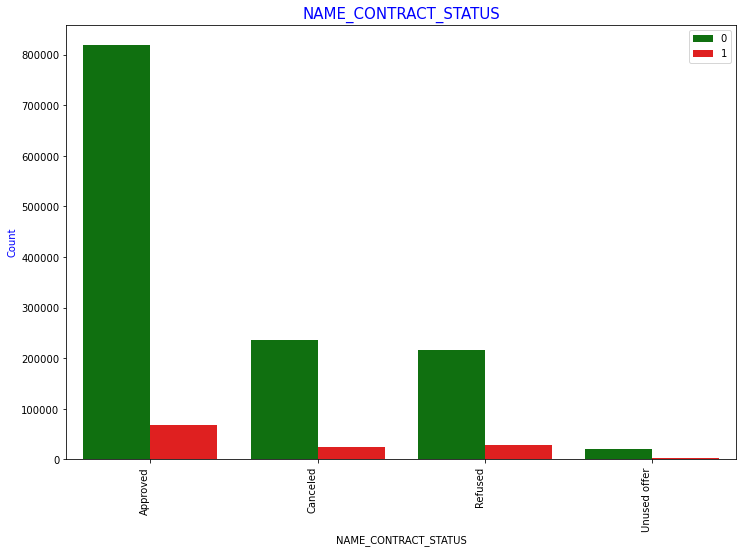

Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%

In [65]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",merged,"TARGET",['g','r'],False,(12,8))
g = merged.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" 
df1

Insights :
1. 88% of the clients who have been previously refused a loan has payed back the loan in current case.
2. 90% of the previously cancelled client have actually repayed the loan. So,revisiting the interest rates would increase business opoortunity for these clients.
3. The refusal of loan by the client should be done for further analysis to create a potential repayer customer. 

In [66]:
# Percentage of defaulters of merged dataframe based on previous contract status
perc_defaulter(merged,'NAME_CONTRACT_STATUS',False)

In [67]:
#Percentage of defaulters of merged data frame based on previous client type 
perc_defaulter(merged,'NAME_CLIENT_TYPE',False)

Insights: 
1. Large number of new applicants approved with revolving loans are defaulters.
2. 12% clients were previously refused are defaulters.

# Observation from the data

Decisive Factor whether an applicant will be Defaulter :
1. CODE_GENDER: Men are at relatively higher default rate. 
2. NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot. 
3. NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education.
4. NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.
5. OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge. 
7. ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting. 
8. AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.

Decisive Factor whether an applicant will be Repayer:

1. NAME_EDUCATION_TYPE: Academic degree has less defaults. 
2. NAME_INCOME_TYPE: Student and Businessmen have no defaults. 
3. ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3% 
4. DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate 
5. AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default 


# Conclusion 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <ul> 
         <li>Bank should more focus on the collecting information and investigation of whether the submitted docs are legit or not.</li>
      <li>Pay more attention to credit behavior of peer groups of clients </li>
      <li>Continue to prefer High education, High Income segments as profit segments</li>
      <li>A new product can developed for lower income groups according to income cap</li>
      <li> Social information about (Guarantor) should be specified it helps to identify in defaulter or re-payer </li>
        </ul>
    </span>    
</div>
